# Getting our data ready to be used with machine learning
Three main things we have to do:
1. Split the data into  features and labels(usually 'x' and 'y').
2. Filling(also called inputing) or disregarding missing values
3.  Converting non-numeric values to numeric values(also called feature encoding)


In [1]:
#Get the data ready
import pandas as pd
import numpy as np

heart_disease=pd.read_csv("data/92 - heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Create x(featured matrix)
X=heart_disease.drop("target",axis=1) 
#Create Y(label matrix)
y=heart_disease["target"]

In [3]:
# Choose the right model or hyperparamter
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#we'll keep the default parameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [5]:
clf.fit(X_train,y_train);

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [7]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [8]:
y_test

240    0
200    0
87     1
36     1
234    0
      ..
115    1
238    0
160    1
243    0
90     1
Name: target, Length: 61, dtype: int64

In [9]:
# Evaluate the model on train and test data
clf.score(X_train,y_train)

1.0

In [10]:
clf.score(X_test,y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [12]:
confusion_matrix(Y_test,Y_preds)

NameError: name 'Y_test' is not defined

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# Improve a model
# Try different amount of n estimator
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with{i} estimators..")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print(" ")
          
    

In [ ]:
# Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))


In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

## Getting our data ready with machine learning
1. Split the data into features and lables("X" and "Y")
2.Filling(also called imputing) or disregarding missing value
3. converting non-numerical values to numerical values(also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X=heart_disease.drop("target",axis=1)
X.head()

In [ ]:
y=heart_disease["target"]
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X.shape[0]*0.8

In [ ]:
len(heart_disease)

## 1.1 Make sure it's all numerical

In [ ]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
car_sales.dtypes

In [ ]:
# Splits into x and y
X=car_sales.drop("Price",axis=1)
y= car_sales["Price"]
# Split into training and test split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor 
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [ ]:
X.head()

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


In [ ]:
X.head()

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

## What if there were missing values
1. Fill them with some value(also called imputaion)
2. Remove the samples with missing data together.

In [ ]:
 # Import car_sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
# To show how many  missing values are there in data
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing["Doors"].value_counts()

In [ ]:
# Create X and y
X= car_sales_missing.drop("Price")
y=car_sales_missing["Price"]

In [ ]:
# let's convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


In [ ]:
car_sales_missing

In [ ]:
# fill the missing data with pandas
# fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
# fill the "Door" column
car_sales_missing["Doors"].fillna(4,inplace=True)

# Check your dataframe again
car_sales_missing.isna().sum()


In [ ]:
#Remove rows with missing values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [ ]:
# let's convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

## Filling missing values with the use of Scikit-Learn

In [ ]:

car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no lables form the car_sales_missing data
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
## Split in X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
# Fill missing value with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numeric value with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define column
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer(something that fills missing values)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

##Transform the data
filled_X=imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled=pd.DataFrame(filled_X,
                              columns=["Make", "Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
## Now we have got our data as numbers and filled(no missing values are there)
## let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


## 2. Choosing the right estimator/algorithm for your problem
Something to note:
* Sklearn calls/refers machine learning models,algorithms as estimators.
* Classification problem- predicting a category(heart disease or not)
  * Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem- predicting a number(selling price of a car)


# Picking a machine learning model for a regression problem
Let's use california housing dataset

In [ ]:
# california housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

In [ ]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

In [ ]:
housing_df["target"]=housing["target"]
housing_df.head()

In [ ]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

In [ ]:

# import algorithm/estimator (Ridge)
from sklearn.linear_model import Ridge



#Setup random seed
np.random.seed(42)

#create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] # median housing price in $100,000s

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
# Instantiate and fit the model(on the training set)
model=Ridge()
model.fit(X_train,y_train)
# Check the score of the model (on the test set)
model.score(X_test,y_test)


In [ ]:

# import algorithm/estimator (Lasso)
from sklearn.linear_model import Lasso
np.random.seed(42)
# Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                               y,
                               test_size=0.2)
#Instantiate and fit the model(on the training set)
model=Lasso()
model.fit(X_train,y_train)
model.score(X_test,y_test)


# What if ridge didn't work or the score didn't fit our needs?
well, we could try a different model..
How about we try an ensemble model( an ensemble is combination ofsmaller models to try and make better prediction than just a single model)?


In [ ]:
#Choosing an estimator for a Regression Problem

# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
#Setup random seed
np.random.seed(42)
#Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split the data into train and test set
X_train, X_test, y_train,y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2)
#Instantiate RandomForestRegressor and fit the model(on the training set)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


# Choosing an estimator for a classification problem


In [ ]:
# Choosing an estimator for a classification problem
heart_disease=pd.read_csv("data/92 - heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

In [ ]:
heart_disease.isna().sum()

In [ ]:
len(heart_disease)

In [ ]:
# Import estimator for classification problem
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)
#Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
clf=LinearSVC()
clf.fit(X_train,y_train)
#Evaluate the LinearSVC
clf.scoreX_test,y_test)



In [ ]:
# Import estimator for classification problem
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)
#Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
#Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

## Fit the model/algorithm on our data and use it to make predictions
## Fitting the model to the data

Different names for:
X=features,features variables,data
y=labels,targets,target variables

In [ ]:
# Use trained model to make predictions
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
#Another way to compare predictions to truth labels to evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

In [ ]:
#Make predictions with predict_proba()
#Predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict() on same data
clf.predict(X_test[:5])

##predict() for regression model

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
# Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
# Create a model instance
model=RandomForestRegressor()

#fit the model to the data
model.fit(X_train,y_train)

#Make prediction
y_preds=model.predict(X_test)


In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
## Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [ ]:
len(y_test)

## Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built in 'score()' method
2.The 'scoring' parameter
3. Problem-specific metric functions

In [ ]:
#Evaluating a model with score() method
from sklearn.ensemble import RandomForestClassifier 
np.random.seed(42)

#Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Create train and test set
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
#Create classifier model instance
clf=RandomForestClassifier()

#fit the model to the data(training the machine learning model)
clf.fit(X_train,y_train)



In [ ]:
#The highest value for the .score() method is 1.0 and the lowest is 0.0
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

Let's use score() method on regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create X and y
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
#Make an instance of Regressor model
model=RandomForestRegressor(n_estimators=500)
# fit the model on the data
model.fit(X_train,y_train)
#score() method on training data
model.score(X_train,y_train)


In [ ]:
#score() method on testing data
# The default score() evaluation metric is r_squared for regression algorithms
#Highest=1.0, lowest=0.0
model.score(X_test,y_test)

In [ ]:
#Evaluating a model using scoring parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)


In [ ]:
#.score() returns a number
clf.score(X_test,y_test) 

In [ ]:
#cross_val_score returns an array
cross_val_score(clf,X,y,cv=10)

In [ ]:
np.random.seed(42)
#Single training and test split score
clf_single_score=clf.score(X_test,y_test)
#Take the mean of 5-fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))
# compare the two
clf_single_score,clf_cross_val_score

In [ ]:
#Default scoring parameter of classifier=mean accuracy
clf.score()

In [ ]:
#Scoring parameter set to none by default 
cross_val_score(clf,X,y,cv=5,scoring=None)


###Classification model evaluation metrics
1.Accuracy
2.Area under Roc curve
3.Confusion matrix
4.Classification report

#Classification model evaluation metrics
# Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)


In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Area under the receiver operating characteristic curve(AUC/ROC)
1.Area under curve(AUC)
2.ROC curve

In [ ]:
# Create train test split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)


In [ ]:
from sklearn.metrics import roc_curve
#fit the classifier
clf.fit(X_train,y_train)
#Make predictions with probabilities
y_probs=clf.predict_proba(X_test)
y_probs[:10]

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

In [ ]:
#Calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
#Check the false positive rate
fpr

In [ ]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="Roc")
    #Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")
    #Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show() 
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

In [ ]:
#Plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

In [ ]:
#Visualize  confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])


In [ ]:
#make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)
#Create confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)
#Plot it using seaborn
sns.heatmap(conf_mat)

Creating a confusion matrix using scikit learn


In [ ]:
import sklearn
sklearn.__version__

In [ ]:
clf

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

# Classification Reports

# Regression model evaluation metrics

#we're going to cover
1.R^2 (pronounced r-squared) or cofficient of determination 
2.Mean absolute error(MAE)
3.Mean squared error(MSE)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)


In [ ]:
model.score(X_test,y_test)

In [ ]:
housing_df.head()

In [ ]:
y_test

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score
#Fill  an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test_mean[:10]

In [ ]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mae

#Mean absolute error
MAE is the average of the absolute differences between prediction and actual values.
It gives you an idea of how wrong your models predictions are.

In [ ]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

In [ ]:
#Let's make it a bit more visual
df=pd.DataFrame(data={"actual values":y_test,
                      "predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)


In [ ]:
#Mae using formula and differences
np.abs(df["differences"]).mean()

In [ ]:
## Scoring parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()
np.random.seed(42)
#Cross validation accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

In [23]:
## Evaluating a model with scikitlearn function for classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Create x and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
# split the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
#Instantiate the model
clf=RandomForestClassifier()
# fit the model
clf.fit(X_train,y_train)
#make prediction
y_preds=clf.predict(X_test)

print("Classifies metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)}")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")

                                    

Classifies metrics on the test set
Accuracy:0.8032786885245902
Precision:0.8055555555555556
Recall:0.8529411764705882


# Tuning hyperparameters by hand
let's make three sets,training,validation and test.

In [17]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to adjust
max_depth
max_features
min_samples_leaf
min_samples_split
n_estimators

In [21]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(precision,2),
                 "f1": round(precision,2)}
    print(f"Accuracy={accuracy*100:.2f}%")
    print(f"Precision={precision*100:.2f}%")
    print(f"Recall={recall*100:.2f}%")
    print(f"F1={f1*100:.2f}%")
    return metric_dict

In [24]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)
#split the data into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split the data into train, validation and test sets
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[:valid_split],y[:valid_split]
len(X_train),len(X_valid),len(X_test)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
#Make baseline predictions
y_preds=clf.predict(X_valid)

#Evaluate the classifier on validation sets
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics



Accuracy=82.22%
Precision=81.48%
Recall=88.00%
F1=84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.81, 'f1': 0.81}

In [25]:
np.random.seed(42)
clf2=RandomForestClassifier(max_depth=10)
clf2.fit(X_train,y_train)
#Make predictions with different hyperparameters
y_preds_2=clf2.predict(X_valid)
#Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy=80.00%
Precision=80.77%
Recall=84.00%
F1=82.35%


# Hyperparameter tuning with RandomizedSearchCV


In [26]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}
np.random.seed(42)

#Split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
#Instantiate the RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,#number of models to try
                          cv=5,
                          verbose=2)

In [42]:
#fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; 

C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [43]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [44]:
#Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)
#Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy=80.33%
Precision=75.00%
Recall=85.71%
F1=80.00%


In [ ]:
# Hyperparameter tuning with GridSearchCV
grid

In [29]:
grid_2={"n_estimators":[10,100,200,500],
      "max_depth":[None],
      "max_features":["auto","sqrt"],
      "min_samples_split":[6],
      "min_samples_leaf":[1,2]}

In [30]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
#Split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
#Instantiate the RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200, 500]},
             verbose=2)

In [31]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [32]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate the prediction
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy=81.97%
Precision=77.42%
Recall=85.71%
F1=81.36%


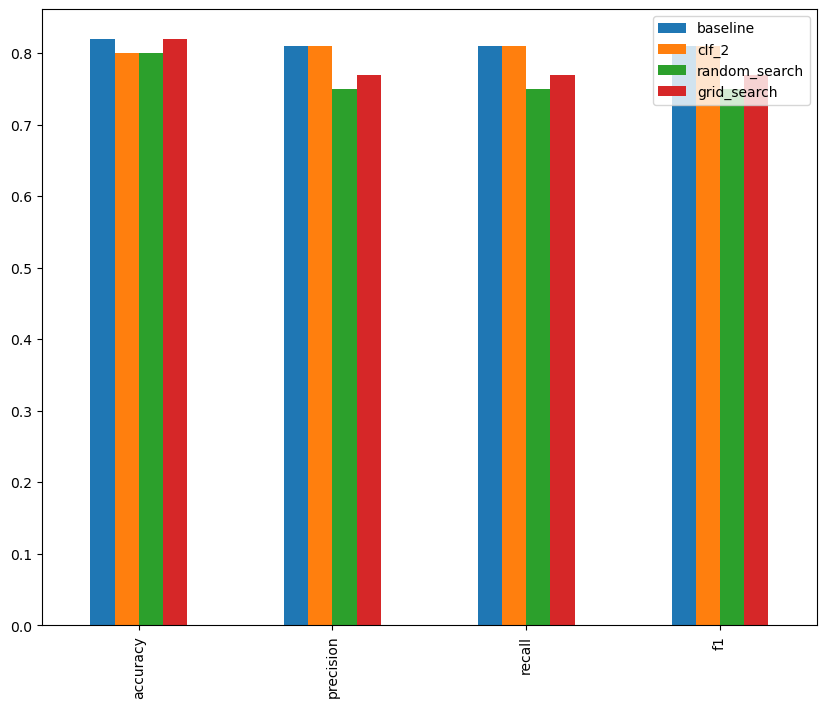

In [45]:
#Comparision of our different models metrics
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random_search":rs_metrics,
                               "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

# Saving and loading trained machine learning model
two ways to save and load model
1. with python's 'pickle' module
2. with the 'joblib' module

# Pickle

In [39]:
import pickle
#save an existing model to a file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl", "wb" ))

In [40]:
#Load the saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [41]:
#Make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy=81.97%
Precision=77.42%
Recall=85.71%
F1=81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.77, 'f1': 0.77}